In [31]:
# Import Packages
from ml import *

In [32]:
# Load data
data = pd.read_csv('/datc/parcel/notebooks/data/postnl/20200904_sample.csv', index_col=0, parse_dates=[1])

In [33]:
data

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag
0,2015-01-02,klant_1,8421,0
1,2015-01-02,klant_2,4547,0
2,2015-01-02,klant_3,13,0
3,2015-01-02,klant_4,0,0
4,2015-01-02,klant_5,0,0
...,...,...,...,...
9835,2019-06-29,klant_2,0,24917
9836,2019-06-29,klant_3,0,20
9837,2019-06-29,klant_4,0,1
9838,2019-06-29,klant_5,0,116


In [34]:
cust_filter = data['cust_id'] == 'klant_6'
date_filter = data['procesdag'].dt.dayofweek <= 4
data = data.where(date_filter & cust_filter).dropna()
data = data.set_index(data.procesdag, drop=True) # drop haalt procesdag column weg
data

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag
procesdag,,,,
2015-01-02,2015-01-02,klant_6,0.0,0.0
2015-01-05,2015-01-05,klant_6,0.0,0.0
2015-01-06,2015-01-06,klant_6,0.0,0.0
2015-01-07,2015-01-07,klant_6,0.0,0.0
2015-01-08,2015-01-08,klant_6,0.0,0.0
...,...,...,...,...
2019-06-24,2019-06-24,klant_6,417.0,132.0
2019-06-25,2019-06-25,klant_6,132.0,207.0
2019-06-26,2019-06-26,klant_6,207.0,144.0


In [35]:
data = data['2017-02-09':]

In [36]:
data.procesdag = pd.to_datetime(data.procesdag)

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [37]:
sec = ((data.procesdag).astype(int) / 1e9).astype(int)

In [38]:
min((sec - sec.shift(1)).dropna())
max((sec - sec.shift(1)).dropna())

259200.0

In [39]:
y = data.aantal_pakketten_volgende_dag
X = data[['procesdag', 'aantal_pakketten']]

In [40]:
train_X = X[:7000]
valid_X = X[7000:]
train_y = y[:7000]
valid_y = y[7000:]

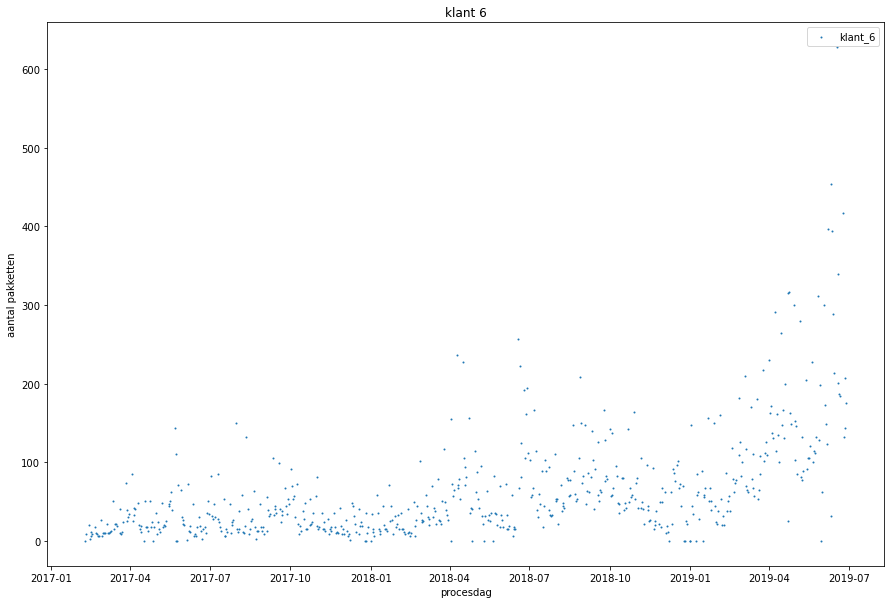

In [41]:
train_X5 = train_X.where(data['cust_id'] == 'klant_6').dropna()
fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(train_X5['procesdag'], train_X5.aantal_pakketten, label='klant_6', s=1)

plt.ylabel('aantal pakketten')
plt.xlabel('procesdag')
plt.title('klant 6')
plt.legend();

In [42]:
train_X5

,procesdag,aantal_pakketten
procesdag,,
2017-02-09,2017-02-09,0.0
2017-02-10,2017-02-10,9.0
2017-02-13,2017-02-13,21.0
2017-02-14,2017-02-14,3.0
2017-02-15,2017-02-15,12.0
...,...,...
2019-06-24,2019-06-24,417.0
2019-06-25,2019-06-25,132.0
2019-06-26,2019-06-26,207.0
